<a href="https://colab.research.google.com/github/junioradkn/quantum-password-hacking./blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1

In [ ]:
!pip install qiskit==0.45.0 qiskit-aer==0.13.0 --quiet

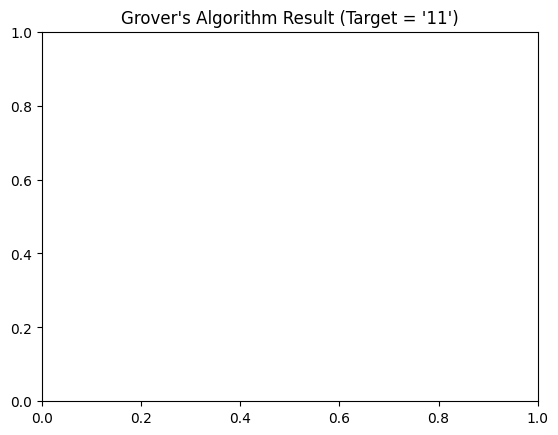

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def oracle(circuit):
    circuit.cz(0, 1)

def diffuser(circuit):
    circuit.h([0, 1])
    circuit.x([0, 1])
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    circuit.x([0, 1])
    circuit.h([0, 1])

grover_circuit = QuantumCircuit(2)
grover_circuit.h([0, 1])
oracle(grover_circuit)
diffuser(grover_circuit)
grover_circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.title("Grover's Algorithm Result (Target = '11')")
plt.show()

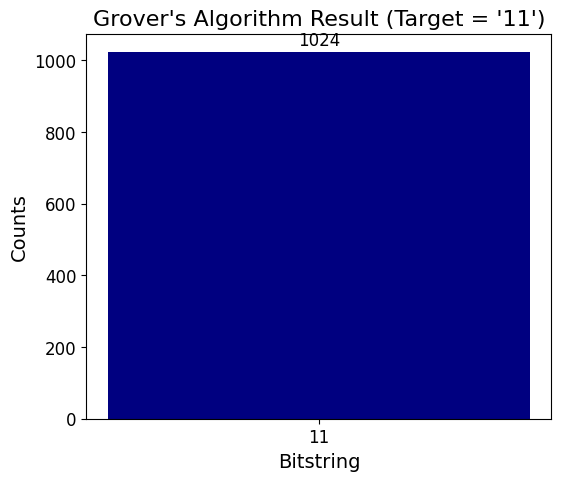

In [ ]:
import matplotlib.pyplot as plt

# Pass the data (counts) yourself
labels = list(counts.keys())
values = list(counts.values())

# Draw bar graphs manually
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='navy')
plt.title("Grover's Algorithm Result (Target = '11')", fontsize=16)
plt.xlabel("Bitstring", fontsize=14)
plt.ylabel("Counts", fontsize=14)

# Write values (counts) above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(values) + 50)
plt.show()

Week 2

In [ ]:
# Reinstall it once (with fixed version)
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install qiskit==0.45.0 qiskit-aer==0.12.1 --quiet

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy

/tmp/ipython-input-5-2895348206.py:28: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)


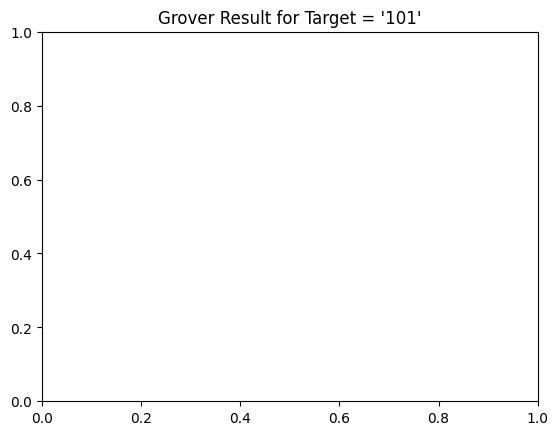

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. target（ex: '101'）
target = '101'

# 2. define an Oracle
def grover_oracle(target):
    qc = QuantumCircuit(3)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)
    return qc

# 3. Diffusion operator
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(range(nqubits))
    qc.x(range(nqubits))
    qc.h(nqubits - 1)
    qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)
    qc.x(range(nqubits))
    qc.h(range(nqubits))
    return qc

# 4. main Circuit
qc = QuantumCircuit(3, 3)
qc.h([0, 1, 2])  # initialization

qc.compose(grover_oracle(target), inplace=True)
qc.compose(diffuser(3), inplace=True)

qc.measure([0, 1, 2], [0, 1, 2])

# 5. simulation
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim, shots=1024).result()
counts = result.get_counts()

# 6. result drawing
plot_histogram(counts)
plt.title(f"Grover Result for Target = '{target}'")
plt.show()

In [ ]:
print("Counts:", counts)

Counts: {'001': 38, '110': 35, '000': 28, '010': 34, '011': 18, '111': 33, '100': 33, '101': 805}


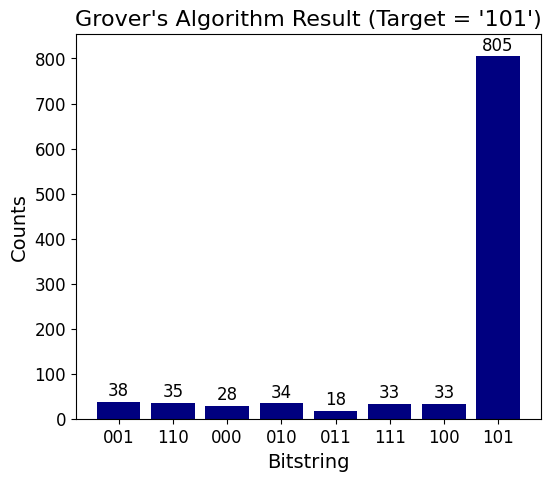

In [ ]:
import matplotlib.pyplot as plt

# pass the data（counts) yourself
labels = list(counts.keys())
values = list(counts.values())

# draw bar graphs manually
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='navy')

# automatically display title targets
plt.title(f"Grover's Algorithm Result (Target = '{target}')", fontsize=16)
plt.xlabel("Bitstring", fontsize=14)
plt.ylabel("Counts", fontsize=14)

# write values (counts) above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(values) + 50)
plt.show()

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

def run_grover_and_check(target: str, iterations: int = 1) -> bool:
    nqubits = len(target)
    qc = QuantumCircuit(nqubits, nqubits)

    qc.h(range(nqubits))

    for _ in range(iterations):
        # Oracle
        for i, bit in enumerate(reversed(target)):
            if bit == '0':
                qc.x(i)
        qc.h(nqubits - 1)
        qc.mct(list(range(nqubits - 1)), nqubits - 1)
        qc.h(nqubits - 1)
        for i, bit in enumerate(reversed(target)):
            if bit == '0':
                qc.x(i)

        # Diffuser
        qc.h(range(nqubits))
        qc.x(range(nqubits))
        qc.h(nqubits - 1)
        qc.mct(list(range(nqubits - 1)), nqubits - 1)
        qc.h(nqubits - 1)
        qc.x(range(nqubits))
        qc.h(range(nqubits))

    qc.measure(range(nqubits), range(nqubits))

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = job.result()
    counts = result.get_counts()
    measured = max(counts, key=counts.get)

    return measured == target

In [ ]:
def success_rate(target: str, iterations: int, trials: int = 100) -> float:
    success = 0
    for _ in range(trials):
        if run_grover_and_check(target, iterations):
            success += 1
    return success / trials

/tmp/ipython-input-10-2429880783.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)
/tmp/ipython-input-10-2429880783.py:25: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)


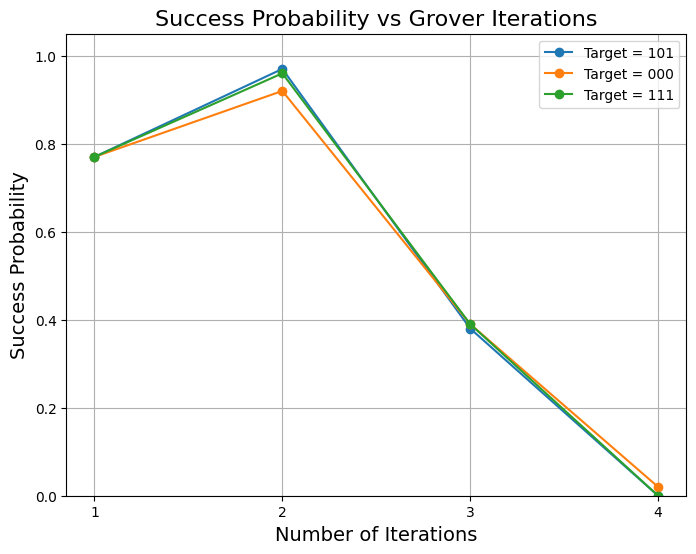

In [ ]:
import matplotlib.pyplot as plt

targets = ['101', '000', '111']
iterations_range = range(1, 5)

plt.figure(figsize=(8, 6))

for target in targets:
    rates = [success_rate(target, i) for i in iterations_range]
    plt.plot(list(iterations_range), rates, marker='o', label=f'Target = {target}')

plt.title("Success Probability vs Grover Iterations", fontsize=16)
plt.xlabel("Number of Iterations", fontsize=14)
plt.ylabel("Success Probability", fontsize=14)
plt.xticks(iterations_range)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()